In [15]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score, cross_val_predict, KFold
from sklearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.metrics import confusion_matrix

import data_preprocessing
%matplotlib inline
params = {'axes.labelsize': 14,'axes.titlesize':14, 'text.fontsize': 14, 'legend.fontsize': 14,
          'xtick.labelsize': 13, 'ytick.labelsize': 14}
rcParams['figure.figsize'] = 6.5, 4

matplotlib.rcParams.update(params)


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [16]:
output_path = "/Users/efiathieniti/Documents/Dropbox/UVA/Data Mining/Assignments/Assignment2/"


In [17]:
data = pd.read_csv('Data Mining VU data/training_set_VU_DM_2014.csv')

In [18]:
df = data.head(5000)


#  Feature Engineering

## Composite features
Rank by group
1. Extract season: autumn, summer, winter 


In [27]:
df = data_preprocessing.create_composite_features(df)

df = data_preprocessing.normalize_within_group(df)
    


In [23]:
# Subselect columns - include booking_book
summary_metrics = pd.DataFrame(df.describe())
summary_metrics.columns

Index(['srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv'

In [190]:
df=df[list(summary_metrics.columns)]

In [192]:
summary_metrics

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool,season
count,5000.0000,5000.000000,5000.000000,328.000000,328.000000,5000.000000,5000.000000,5000.000000,4992.000000,5000.000000,...,310.000000,376.000000,140.000000,1982.000000,2060.000000,623.000000,5000.000000,136.000000,5000.000000,5000.000000
mean,175.6626,10.055800,177.633800,3.208384,179.015854,174.413800,70258.955400,3.079000,3.756510,0.633400,...,0.174194,0.119681,22.614286,-0.076186,0.008252,14.051364,0.045000,429.725882,0.027200,1.930200
std,102.7139,7.798208,65.090219,0.667490,62.477158,68.192195,40369.113419,1.069854,1.039713,0.481924,...,0.587335,0.348767,49.315252,0.475283,0.214641,12.496968,0.207325,583.879615,0.162682,0.917331
min,1.0000,5.000000,4.000000,2.300000,74.790000,13.000000,18.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000,47.100000,0.000000,1.000000
25%,90.0000,5.000000,100.000000,2.500000,122.510000,100.000000,36035.750000,3.000000,3.500000,0.000000,...,0.000000,0.000000,7.750000,0.000000,0.000000,7.000000,0.000000,128.082500,0.000000,1.000000
50%,162.0000,5.000000,219.000000,3.260000,180.750000,219.000000,69892.500000,3.000000,4.000000,1.000000,...,0.000000,0.000000,12.000000,0.000000,0.000000,11.000000,0.000000,208.120000,0.000000,2.000000
75%,265.0000,14.000000,219.000000,3.740000,229.180000,219.000000,104517.000000,4.000000,4.500000,1.000000,...,1.000000,0.000000,24.000000,0.000000,0.000000,17.000000,0.000000,496.932500,0.000000,2.000000
max,365.0000,32.000000,220.000000,5.000000,334.430000,221.000000,140812.000000,5.000000,5.000000,1.000000,...,1.000000,1.000000,527.000000,1.000000,1.000000,153.000000,1.000000,4491.280000,1.000000,4.000000


In [25]:
 df.columns.get_loc("booking_bool")

53

### Calculate correlation and mutual information/information gain

In [28]:
#columns_to_plot=[50,12,39,42,47,48,51,53]
#g = sns.pairplot( df.iloc[1:500,columns_to_plot], hue="booking_bool",palette = 'seismic',size=5,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10),  )



In [201]:
selected_features = ['value_for_money','price_usd_normalized', 'star_rank']
features_to_keep = ['booking_bool']
all_possible_features = selected_features+features_to_keep
df_to_train = df.ix[:,all_possible_features]

## Missing values

In [205]:
for feature in all_possible_features:
    df_to_train[feature][df_to_train[feature].isnull()] = df_to_train[feature].median()


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Build Model and classifier

In [203]:
## Finalise the dataset
final_df=df_to_train

# Choose setting 
mode = 'Full' # 'Full' or 'partial'
model_to_plot=0 # 0 or 1
mode = 'partial'

# For SVM use Age continuous as it can learn nonlinear relationships
#selected_features =["Pclass", "Sex", "Age*Class", "Fare_Per_Person", "hasCabin", 
#                    "Title","Survived",
#                   "Family_Size", "Embarked", "Age"]

select = ['booking_bool']
auc = []

models_names = [ 'LogisticRegression', 'RandomForestClassifier', 'KNeighborsClassifier' ]
metric = 'roc_auc'
cv=4
models = [ LogisticRegression,  RandomForestClassifier , SVC]


['booking_bool', 'value_for_money']


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average

0.540329310178
['booking_bool', 'value_for_money', 'price_usd_normalized']


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average

0.529048955108
['booking_bool', 'value_for_money', 'price_usd_normalized', 'star_rank']


/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average

0.60941128096


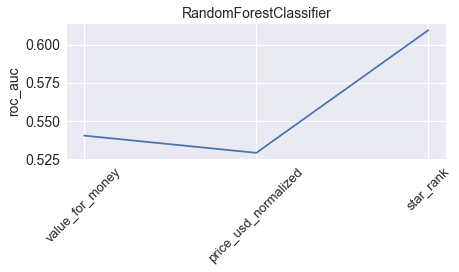

In [204]:

model_to_plot = 1
class_predict = "booking_bool"
all_possible_features = selected_features       
for feature in all_possible_features:
    select.append(feature)
    print(select)
    full_set = final_df[select]

    # First split the data into train and test

    # Extract the train and test from the new data_frame
    cols = list(set(full_set.columns) - set([class_predict]))
    X_train = full_set[:][cols]
    y_train = full_set[:][class_predict]
    
        # Running some models, testing with small cross_validation and f1 metric (binary target) and running the prediction
    # with all the training set
    
    mscores = []
    lscores = ['f1','accuracy','recall','roc_auc']
    np.random.seed(42) # Reproducibility of results is very important!
    for elem in models:
        mscores2 = []
        model = elem()
        for sc in lscores:
            scores = cross_val_score(model, X_train, y_train, scoring=sc, cv=cv)
            #y_pred = cross_val_predict(model, X_train, y_train, scoring=sc, cv=cv)
            #conf_mat = confusion_matrix(y_train,y_pred)
            
            mscores2.append(np.mean(scores))
            mscores.append(mscores2)
       # model_predict(model, X_train, y_train, mode)       
    scores = pd.DataFrame(mscores, columns=lscores)
    print(scores.ix[model_to_plot,metric])
    auc.append(scores.ix[model_to_plot,metric])

plt.plot(auc)
plt.ylabel(metric)
plt.title(models_names[model_to_plot])
plt.xticks(np.arange(len(all_possible_features)), all_possible_features,  rotation=45)
plt.savefig(output_path + "auc_by_feature_%s_%s_cv%s.png"%(models_names[model_to_plot], mode, cv), format='png')
plt.tight_layout()  
plt.show()
    